In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Crippen
from rdkit.Chem import PandasTools
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem import rdRGroupDecomposition as rdRGD
from rdkit.Chem import rdFMCS

In [4]:
data_fn = 'spreadsheet1.csv'
data = pd.read_csv(data_fn, delimiter=',')
data.head()

,Molecule,Input Smiles From Supplementary Material EXCEL File,AB-MPS Score,ALogP,Acid pKa 1,Acid pKa 2,Acid pKa 3,Asphericity (3D),Basic pKa 1,Basic pKa 2,...,mlPS (m3c),mlPS (m3c) Gdns,"mlPapp (PGP,3c)","mlPapp (PGP,3c) Gdns","mlPapp (PGP,m3c)","mlPapp (PGP,m3c) Gdns",mlPhototox (2c),mlPhototox (2c) Gdns,mlSolubility (3c),mlSolubility (3c) Gdns
0,NaN,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,12.70,3.54,3.78,9.79,NaN,0.64,NaN,NaN,...,high (>= 80),good,low (<= 50),best,low (<= 50),best,neg,good,high (>= 150 ug/ml),good
1,NaN,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,11.97,4.29,3.78,9.79,NaN,0.78,NaN,NaN,...,high (>= 80),good,low (<= 50),good,low (<= 50),best,neg,good,high (>= 150 ug/ml),fair
2,NaN,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,13.74,3.43,3.78,9.79,NaN,0.64,NaN,NaN,...,high (>= 80),fair,low (<= 50),best,low (<= 50),best,neg,good,high (>= 150 ug/ml),good
3,NaN,Cc1ccc(cc1)c2ccc(cc2)S(=O)(=O)N[C@@H](Cc3ccc(O...,12.40,4.03,3.78,9.79,NaN,0.67,NaN,NaN,...,high (>= 80),good,low (<= 50),good,low (<= 50),best,neg,good,high (>= 150 ug/ml),fair
4,NaN,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,13.44,5.04,3.78,9.79,NaN,0.61,NaN,NaN,...,high (>= 80),fair,low (<= 50),fair,low (<= 50),best,neg,poor,medium (5 - 150 ug/ml),poor


In [5]:
print(data.columns)

Index(['Molecule', 'Input Smiles From Supplementary Material EXCEL File',
       'AB-MPS Score', 'ALogP', 'Acid pKa 1', 'Acid pKa 2', 'Acid pKa 3',
       'Asphericity (3D)', 'Basic pKa 1', 'Basic pKa 2',
       ...
       'mlPS (m3c)', 'mlPS (m3c) Gdns', 'mlPapp (PGP,3c)',
       'mlPapp (PGP,3c) Gdns', 'mlPapp (PGP,m3c)', 'mlPapp (PGP,m3c) Gdns',
       'mlPhototox (2c)', 'mlPhototox (2c) Gdns', 'mlSolubility (3c)',
       'mlSolubility (3c) Gdns'],
      dtype='object', length=149)


In [6]:
print(len(data))
print(data.shape)

2500
(2500, 149)


In [7]:
data.rename(columns = {'Input Smiles From Supplementary Material EXCEL File' : 'smiles'}, inplace = True)

,smiles,ROMol
0,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,
1,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,
2,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,

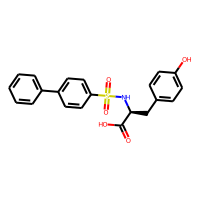
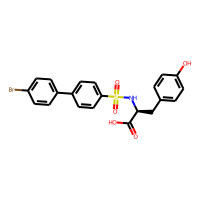
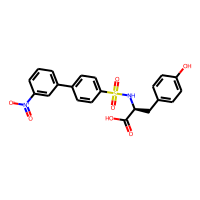

In [9]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='smiles', molCol='ROMol')
data[['smiles', 'ROMol']].head(n=3)

In [10]:
descriptors = data.filter(['smiles', 'ROMol'], axis=1)

In [11]:
def calc_descriptors(df, molCol='ROMol'):
    df['Num rings'] = df[molCol].apply(rdMolDescriptors.CalcNumRings)
    df['Molecular weight'] = df[molCol].apply(rdMolDescriptors.CalcExactMolWt)
    df['Num HBA'] = df[molCol].apply(rdMolDescriptors.CalcNumHBA)
    df['Num HBA'] = df[molCol].apply(rdMolDescriptors.CalcNumHBD)
    df['MolLogP'] = df[molCol].apply(Crippen.MolLogP)
    df['Rotatable bonds'] = df[molCol].apply(rdMolDescriptors.CalcNumRotatableBonds)
    df['Num heteroatoms'] = df[molCol].apply(rdMolDescriptors.CalcNumHeteroatoms)
    df['Num heterocycles'] = df[molCol].apply(rdMolDescriptors.CalcNumHeterocycles)
    df['Num aliphatic carbocycles'] = df[molCol].apply(rdMolDescriptors.CalcNumAliphaticCarbocycles)
    df['Num aliphatic heterocycles'] = df[molCol].apply(rdMolDescriptors.CalcNumAliphaticHeterocycles)
    df['Num aliphatic rings'] = df[molCol].apply(rdMolDescriptors.CalcNumAliphaticRings)
    df['Num amide bonds'] = df[molCol].apply(rdMolDescriptors.CalcNumAmideBonds)
    df['Num aromatic carbocycles'] = df[molCol].apply(rdMolDescriptors.CalcNumAromaticCarbocycles)
    df['Num aromatic heterocycles'] = df[molCol].apply(rdMolDescriptors.CalcNumAromaticHeterocycles)
    df['Num aromatic rings'] = df[molCol].apply(rdMolDescriptors.CalcNumAromaticRings)
    df['Num atom stereo centres'] = df[molCol].apply(rdMolDescriptors.CalcNumAtomStereoCenters)
    df['Num bridgehead atoms'] = df[molCol].apply(rdMolDescriptors.CalcNumBridgeheadAtoms)

In [12]:
calc_descriptors(descriptors)
descriptors.columns

Index(['smiles', 'ROMol', 'Num rings', 'Molecular weight', 'Num HBA',
       'MolLogP', 'Rotatable bonds', 'Num heteroatoms', 'Num heterocycles',
       'Num aliphatic carbocycles', 'Num aliphatic heterocycles',
       'Num aliphatic rings', 'Num amide bonds', 'Num aromatic carbocycles',
       'Num aromatic heterocycles', 'Num aromatic rings',
       'Num atom stereo centres', 'Num bridgehead atoms'],
      dtype='object')

,smiles,ROMol,Num rings,Molecular weight,Num HBA,MolLogP,Rotatable bonds,Num heteroatoms,Num heterocycles,Num aliphatic carbocycles,Num aliphatic heterocycles,Num aliphatic rings,Num amide bonds,Num aromatic carbocycles,Num aromatic heterocycles,Num aromatic rings,Num atom stereo centres,Num bridgehead atoms
0,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,,3,397.098394,3,3.03340,7,7,0,0,0,0,0,3,0,3,1,0
1,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,,3,475.008906,3,3.79590,7,8,0,0,0,0,0,3,0,3,1,0
2,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,,3,442.083472,3,2.94160,8,10,0,0,0,0,0,3,0,3,1,0
3,Cc1ccc(cc1)c2ccc(cc2)S(=O)(=O)N[C@@H](Cc3ccc(O...,,3,411.114044,3,3.34182,7,7,0,0,0,0,0,3,0,3,1,0
4,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,,5,487.108958,3,4.93280,7,8,1,0,0,0,0,4,1,5,1,0

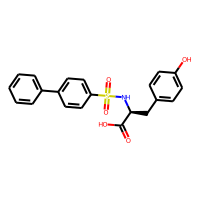
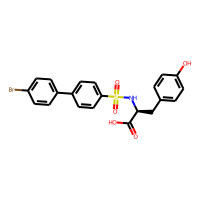
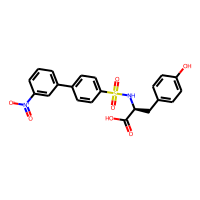
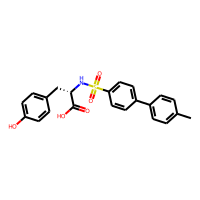
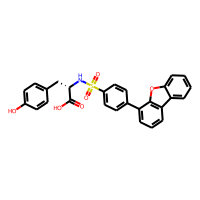

In [13]:
descriptors.head()

In [45]:
mols = [Chem.MolFromSmiles(x) for x in data['smiles']]
len(mols)

2500

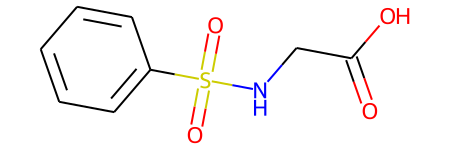

In [57]:
scaffold = Chem.MolFromSmiles('O=S(C1=CC=CC=C1)(NCC(O)=O)=O')
scaffold

In [58]:
groups,_ = rdRGD.RGroupDecompose([scaffold], mols, asSmiles=True)

In [72]:
groups_frame = pd.DataFrame(groups)

In [73]:
groups_frame

,Core,R1,R2
0,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],c1ccc([*:2])cc1
1,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],Brc1ccc([*:2])cc1
2,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],O=[N+]([O-])c1cccc([*:2])c1
3,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],Cc1ccc([*:2])cc1
4,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],c1ccc2c(c1)oc1c([*:2])cccc12
...,...,...,...
2495,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,COc1cccc([*:2])c1F
2496,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,CCOC(=O)c1cccc([*:2])c1
2497,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,Cc1ccc([*:2])cc1F
2498,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,COc1c(F)cc(F)cc1[*:2]


In [74]:
new_frame = groups_frame
new_frame

,Core,R1,R2
0,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],c1ccc([*:2])cc1
1,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],Brc1ccc([*:2])cc1
2,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],O=[N+]([O-])c1cccc([*:2])c1
3,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],Cc1ccc([*:2])cc1
4,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],c1ccc2c(c1)oc1c([*:2])cccc12
...,...,...,...
2495,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,COc1cccc([*:2])c1F
2496,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,CCOC(=O)c1cccc([*:2])c1
2497,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,Cc1ccc([*:2])cc1F
2498,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],[H][*:1].c1csc(SC[*:1])c1,COc1c(F)cc(F)cc1[*:2]


In [82]:
PandasTools.AddMoleculeColumnToFrame(new_frame, smilesCol='Core', molCol='Core')
PandasTools.AddMoleculeColumnToFrame(new_frame, smilesCol='R1', molCol='R1')
PandasTools.AddMoleculeColumnToFrame(new_frame, smilesCol='R2', molCol='R2')

th dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [11:05:43] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WA

,Core,R1,R2
0,,,
1,,,
2,,,
3,,,
4,,,

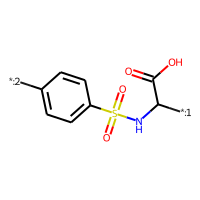
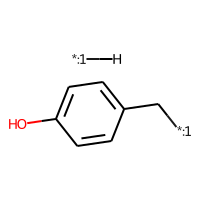
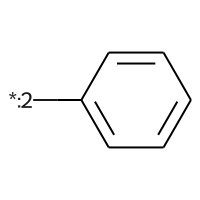
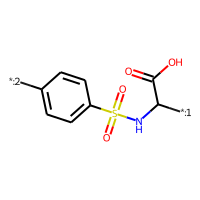
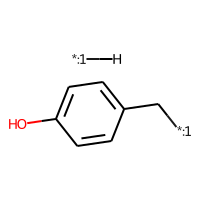
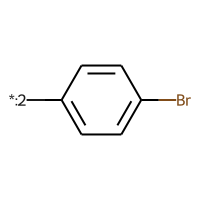
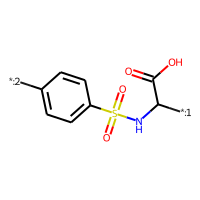
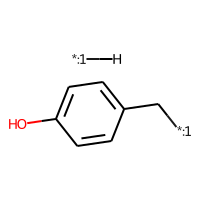
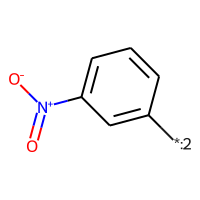
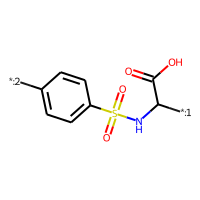
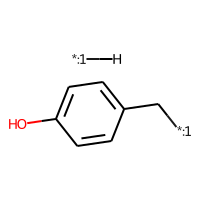
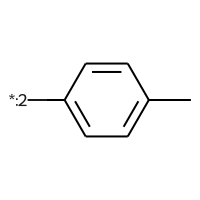
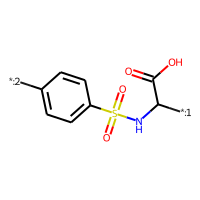
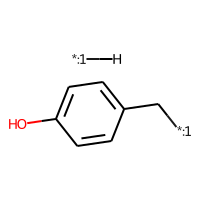
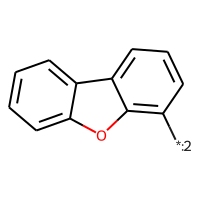

In [84]:
new_frame.head()

In [109]:
print(len(groups_frame['Core'].unique()))
print(len(groups_frame['R1'].unique()))
print(len(groups_frame['R2'].unique()))

1
50
50
